출처: https://statisticsglobe.com/biplot-pca-python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
diabetes = load_diabetes()
df = pd.DataFrame(data=diabetes.data, 
                  columns=diabetes.feature_names)
 
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [3]:
scaler = StandardScaler()
 
scaler.fit(df)
 
Diabetes_scaled = scaler.transform(df)

pca = PCA(n_components=2)

PC_scores = pd.DataFrame(pca.fit_transform(Diabetes_scaled),
               columns = ['PC 1', 'PC 2'])
PC_scores.head()

,PC 1,PC 2
0,0.587199,-1.946832
1,-2.831625,1.372082
2,0.272129,-1.634901
3,0.049281,0.382278
4,-0.756421,0.811960


In [4]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], 
                        index=diabetes.feature_names)
loadings

,PC1,PC2
age,0.216431,0.044367
sex,0.186967,-0.386547
bmi,0.303162,-0.156281
bp,0.271738,-0.138266
s1,0.343255,0.573027
s2,0.351861,0.455942
s3,-0.282437,0.506239
s4,0.428834,-0.068181
s5,0.378618,-0.026187
s6,0.322183,-0.084949


In [5]:
PC1 = pca.fit_transform(Diabetes_scaled)[:,0]
PC2 = pca.fit_transform(Diabetes_scaled)[:,1]
ldngs = pca.components_

scalePC1 = 1.0/(PC1.max() - PC1.min())
scalePC2 = 1.0/(PC2.max() - PC2.min())
features = diabetes.feature_names

#### 1. Biplot Using Matplotlib

Text(0.5, 1.0, 'Figure 1')

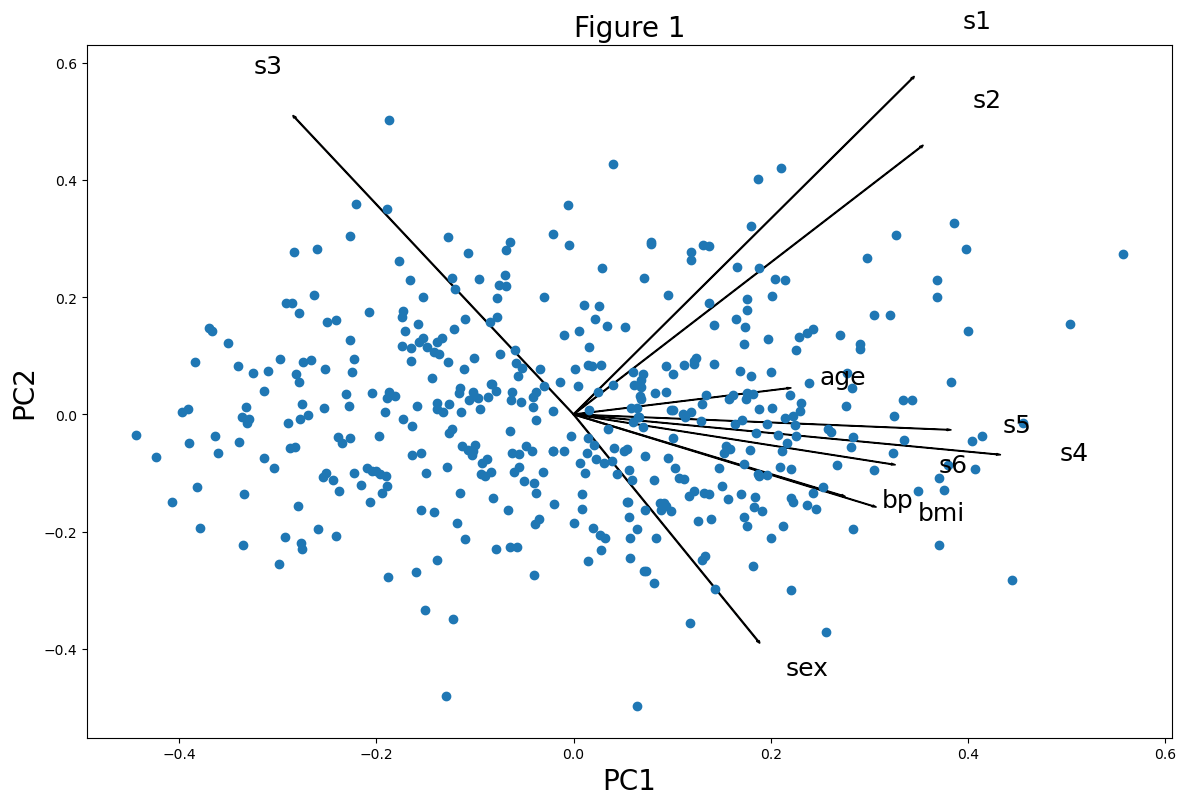

In [6]:
fig, ax = plt.subplots(figsize=(14, 9))
 
for i, feature in enumerate(features):
    ax.arrow(0, 0, ldngs[0, i], 
             ldngs[1, i])
    ax.text(ldngs[0, i] * 1.15, 
            ldngs[1, i] * 1.15, 
            feature, fontsize=18)
 
ax.scatter(PC1 * scalePC1,PC2 * scalePC2)
 
ax.set_xlabel('PC1', fontsize=20)
ax.set_ylabel('PC2', fontsize=20)
ax.set_title('Figure 1', fontsize=20)

Text(0.5, 1.0, 'Figure 2')

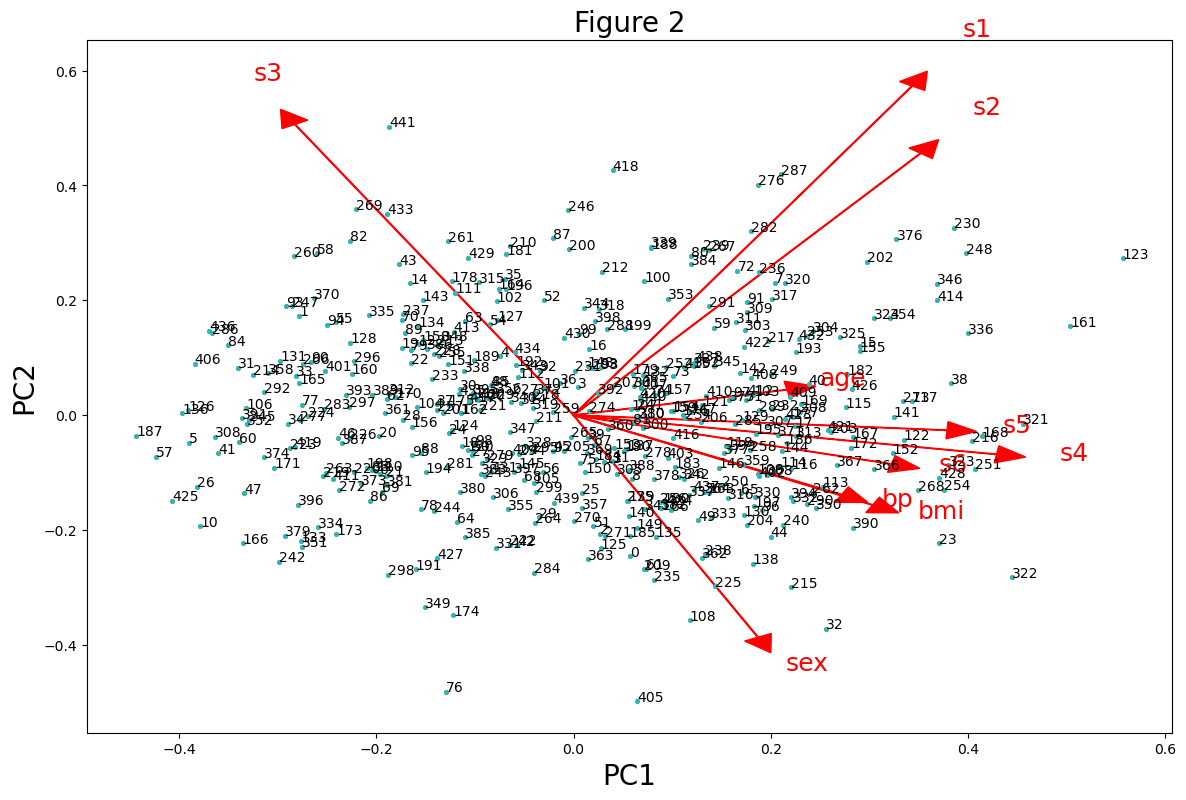

In [7]:
fig, ax = plt.subplots(figsize=(14, 9))
 
for i, feature in enumerate(features):
    ax.arrow(0, 0, ldngs[0, i], 
             ldngs[1, i], 
             head_width=0.03, 
             head_length=0.03, 
             color="red")
    ax.text(ldngs[0, i] * 1.15, 
            ldngs[1, i] * 1.15, 
            feature,color="red", fontsize=18)
 
    ax.scatter(PC1 * scalePC1,
                    PC2 * scalePC2, s=5)
 
for i, label in enumerate(PC_scores.index):
    ax.text(PC1[i] * scalePC1, 
            PC2[i] * scalePC2, str(label), 
            fontsize=10)
 
ax.set_xlabel('PC1', fontsize=20)
ax.set_ylabel('PC2', fontsize=20)
ax.set_title('Figure 2', fontsize=20)

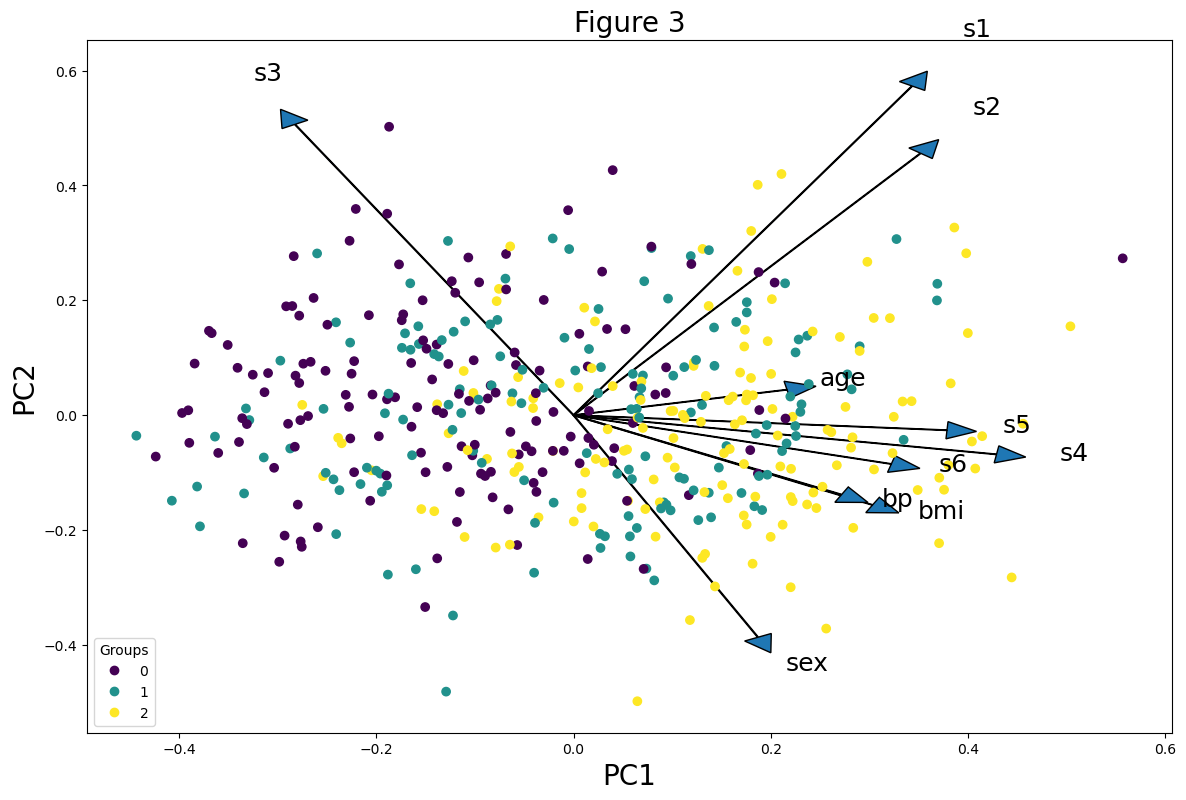

In [8]:
target_groups = np.digitize(diabetes.target, 
                            np.quantile(diabetes.target, 
                                        [1/3, 2/3]))

fig, ax = plt.subplots(figsize=(14, 9))
 
for i, feature in enumerate(features):
    ax.arrow(0, 0, ldngs[0, i], 
             ldngs[1, i], 
             head_width=0.03, 
             head_length=0.03)
    ax.text(ldngs[0, i] * 1.15, 
            ldngs[1, i] * 1.15, 
            feature, fontsize = 18)
 
scatter = ax.scatter(PC1 * scalePC1, 
                     PC2 * scalePC2, 
                     c=target_groups, 
                     cmap='viridis')
 
ax.set_xlabel('PC1', fontsize=20)
ax.set_ylabel('PC2', fontsize=20)
ax.set_title('Figure 3', fontsize=20)
 
ax.legend(*scatter.legend_elements(),
                    loc="lower left", 
                    title="Groups")

#### 2. Biplot of PCA Using Seaborn

Text(0.5, 1.0, 'Figure 4')

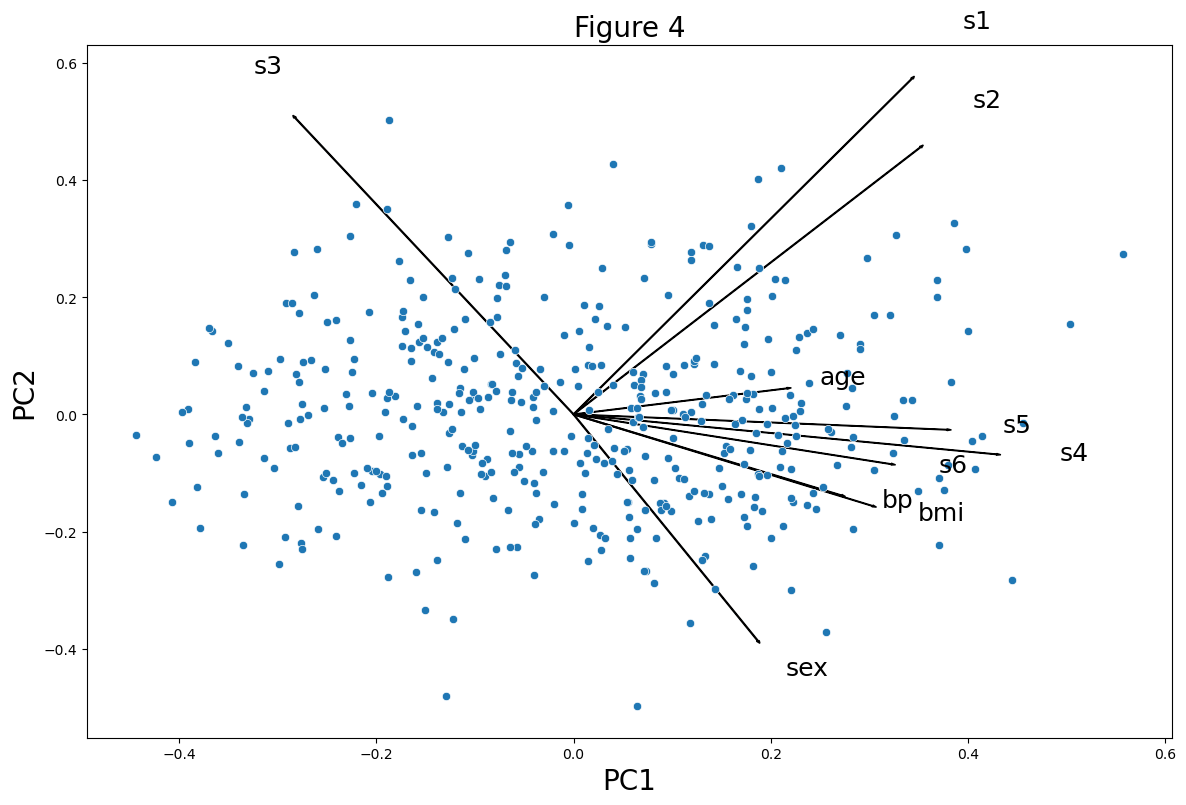

In [9]:
plt.figure(figsize=(14,9))
 
for i, feature in enumerate(features):
    plt.arrow(0, 0, ldngs[0, i], 
             ldngs[1, i])
    plt.text(ldngs[0, i] * 1.15, 
            ldngs[1, i] * 1.15, 
            feature, fontsize=18)
 
sns.scatterplot(x=PC1 * scalePC1,
                y=PC2 * scalePC2)
 
plt.xlabel('PC1', fontsize=20)
plt.ylabel('PC2', fontsize=20)
plt.title('Figure 4', fontsize=20)

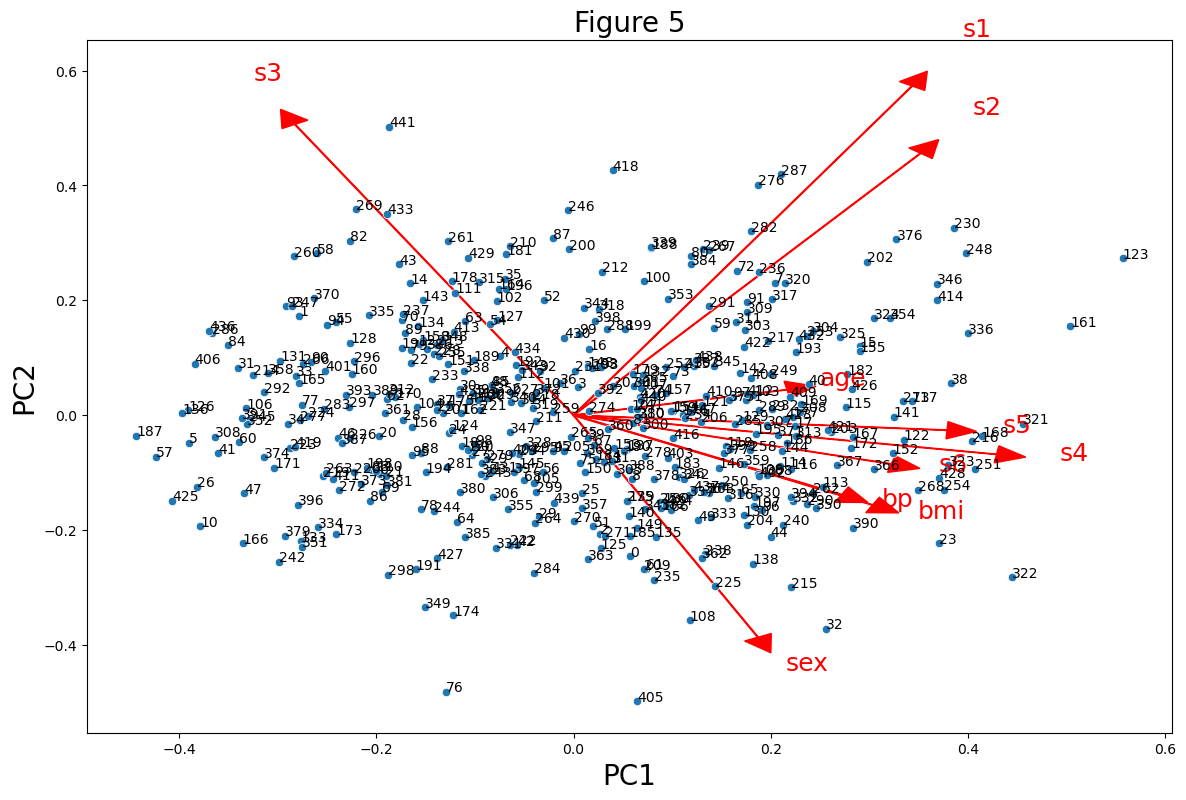

In [10]:
plt.figure(figsize=(14,9))
 
for i, feature in enumerate(features):
    plt.arrow(0, 0, ldngs[0, i], 
             ldngs[1, i],
            color="red",
            head_width=0.03, 
            head_length=0.03)
    plt.text(ldngs[0, i] * 1.15, 
            ldngs[1, i] * 1.15, 
            feature, 
            color="red",
            fontsize=18)
 
sns.scatterplot(x=PC1 * scalePC1,
                y=PC2 * scalePC2)
 
plt.xlabel('PC1', fontsize=20)
plt.ylabel('PC2', fontsize=20)
plt.title('Figure 5', fontsize=20)
 
for i, label in enumerate(PC_scores.index):
    plt.text(PC1[i] * scalePC1, 
            PC2[i] * scalePC2, str(label), 
            fontsize=10)

Text(0.5, 1.0, 'Figure 6')

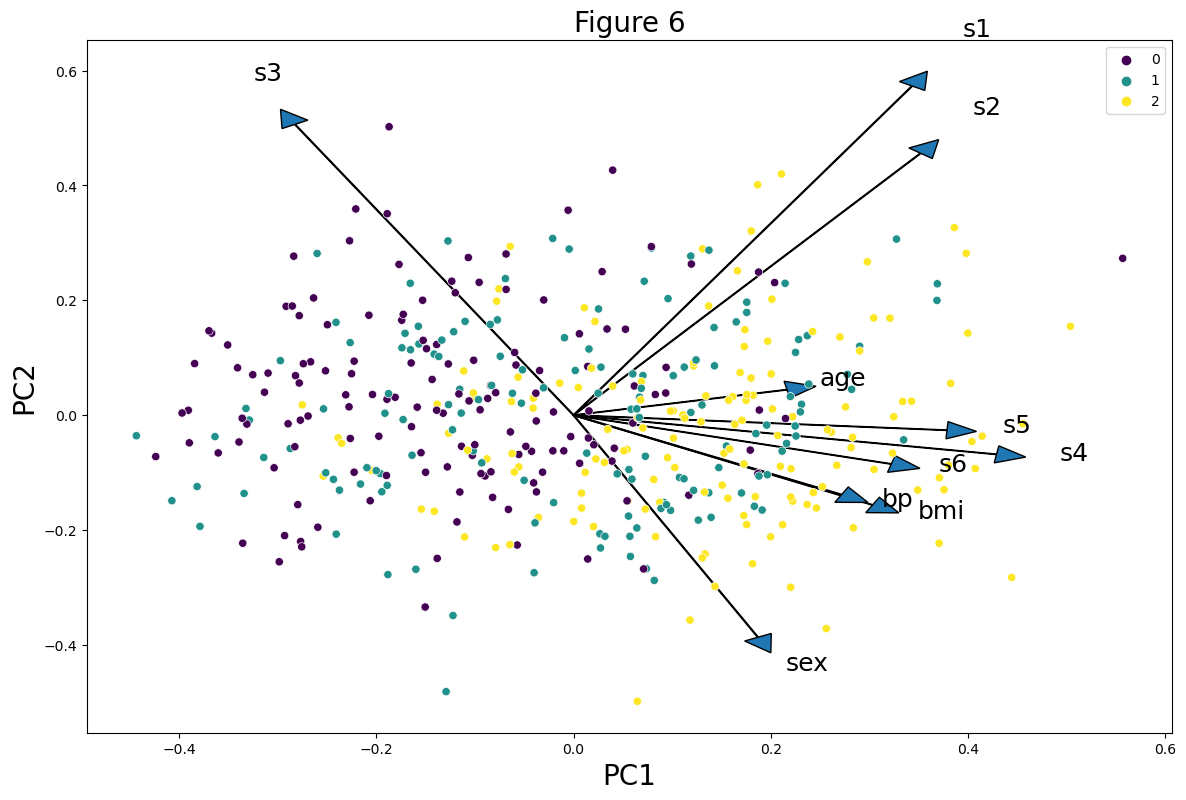

In [11]:
plt.figure(figsize=(14,9))
 
for i, feature in enumerate(features):
    plt.arrow(0, 0, ldngs[0, i], 
             ldngs[1, i], 
              head_width=0.03, 
             head_length=0.03)
    plt.text(ldngs[0, i] * 1.15, 
            ldngs[1, i] * 1.15, 
            feature, fontsize=18)
 
sns.scatterplot(x=PC1 * scalePC1,
                y=PC2 * scalePC2, 
                hue=target_groups,
                palette="viridis")
 
plt.xlabel('PC1', fontsize=20)
plt.ylabel('PC2', fontsize=20)
plt.title('Figure 6', fontsize=20)